In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("datasets/stock_data.csv",header=1,names=["stock_symbol","eps","revenue","price","people"],na_values={"people":["n.a."],"price":["n.a."],"eps":["not available",-1],"revenue":-1})
df.dropna(thresh=3,inplace=True)
df_new=pd.DataFrame({
    "name":['Rob','Rafiq','Nina','Sofia','Mohan','Tao','Elon Musk'],
    "income":[5000,6000,4000,7500,8000,7000,10000000]
})
df_new["income"].astype(dtype=np.int32)
df_new

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [34]:
df_new.describe()

,income
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


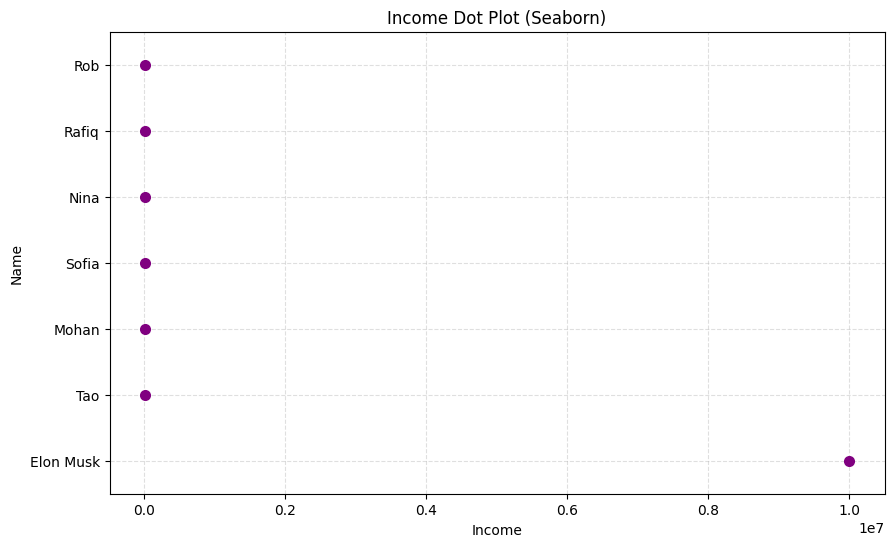

In [133]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="income", y="name", data=df_new, color="purple", size=8, jitter=False)
plt.title("Income Dot Plot (Seaborn)")
plt.xlabel("Income")
plt.ylabel("Name")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [113]:
q1=df_new.income.quantile(0.25)
q3=df_new.income.quantile(0.75)
iqr=q3-q1
df_no_outliers=df_new[(df_new.income>q1-1.5*iqr)&(df_new.income<q3+1.5*iqr)]
df_no_outlier

,name,income
0,Rob,5000
1,Rafiq,0
2,Nina,0
3,Sofia,0
4,Mohan,8000
5,Tao,7000


In [126]:
df_no_outlier.replace(0,np.nan,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7536\3429921797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier.replace(0,np.nan,inplace=True)


In [128]:
df_no_outlier.fillna({"income":round(df_no_outlier.income.mean(),2)})

,name,income
0,Rob,5000.00
1,Rafiq,6666.67
2,Nina,6666.67
3,Sofia,6666.67
4,Mohan,8000.00
5,Tao,7000.00


<h2 style="color:blue font:32">ASS</h2>

In [3]:
df_ny=pd.read_csv("datasets/AB_NYC_2019.csv")
df_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


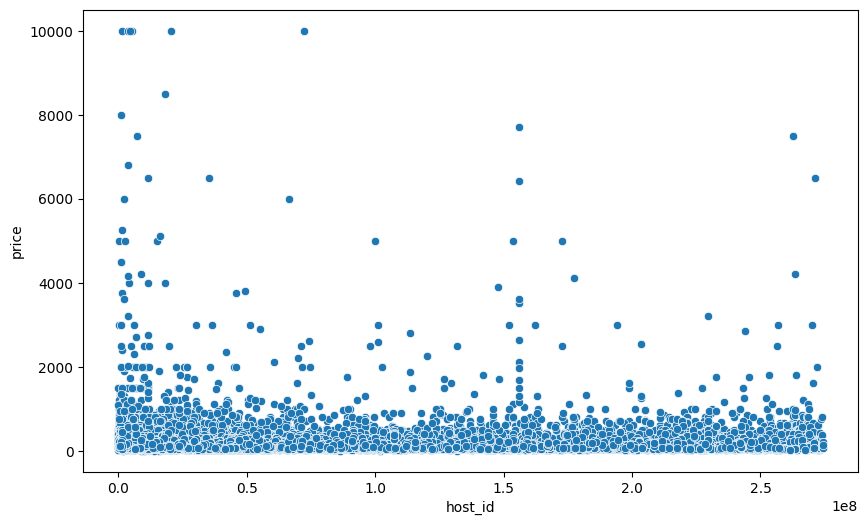

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ny,x="host_id",y="price")
plt.show()

(0.0, 3500.0)

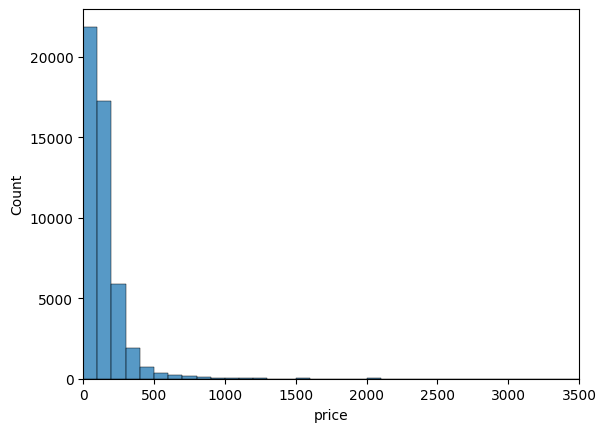

In [17]:
sns.histplot(df_ny["price"],bins=100)
plt.xlim(0,3500)